# Data Understanding

In [345]:
# Task : import semua library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Exploratory Data Analysis

In [346]:
# Task : load dataset
df = pd.read_csv('football.csv')
df.head()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [347]:
# Task : bentuk dari dataset
df.shape

(1216, 7)

> Dataset memiliki 1,216 baris dan 7 kolom fitur.

In [348]:
# Task : memengetahui info dataset seperti null dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


> Tidak ada data yang bernilai `null`. Terdapat 3 fitur bertipe string (Teams, Seasons, Players) dan 4 fitur bertipe numerik (Mathes, Goals, Assists, Seasons Ratings).

In [349]:
# Task : Mengumpulkan fitur numerik
numerical_features = df.select_dtypes(include=['number']).columns.to_list()
numerical_features

['Matches', 'Goals', 'Assists', 'Seasons Ratings']

> Terdapat 4 fitur yang memiliki tipe numerik sesuai dengan `df.info()`.

In [350]:
# Task : Hapus fitur selain numerik karena tidak diperlukan dalam proyek kali ini
df = df[numerical_features]
df.head()

,Matches,Goals,Assists,Seasons Ratings
0,15,14,11,8.5
1,14,11,5,8.0
2,41,21,20,8.1
3,34,11,14,7.9
4,47,38,12,8.4


> Terdapat beberapa pemain yang memiliki goal dan assist 0. Dalam kondisi nyata, statistik ini tidak berpengaruh karena performa dapat dinilai dari aspek lain. Untuk proyek ini baris yang memiliki goal dan assist 0 akan di drop karena dapat dianggap outlier sehingga berpotensi mengganggu performa model.

In [351]:
# Task : Mengetahui ringkasan distribusi data
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,1216.000000,1216.000000,1216.000000,1216.000000
mean,37.024671,8.059211,4.797697,7.111595
std,11.762088,9.351558,4.496019,0.410907
min,1.000000,0.000000,0.000000,5.100000
25%,31.000000,2.000000,1.000000,6.900000
50%,39.000000,4.000000,4.000000,7.100000
75%,46.000000,12.000000,7.000000,7.300000
max,59.000000,55.000000,25.000000,8.900000


In [352]:
# Task : memeriksa missing value atau bernilai 0
missing_values = (df[numerical_features] == 0).sum()
missing_values

Matches              0
Goals              152
Assists            174
Seasons Ratings      0
dtype: int64

In [353]:
# Task : mencatat semua index yang memiliki goals atau assist 0
miss_values_loc = df.loc[(df['Goals']==0) | (df['Assists']==0)]
miss_values_loc.shape

(257, 4)

> Terdapat total 257 baris yang perlu di drop

In [354]:
# Task : Drop index yang memiliki goals atau assist 0
df = df.drop(miss_values_loc.index)
df.shape

(959, 4)

> Terdapat 957 baris setelah dilakukan drop

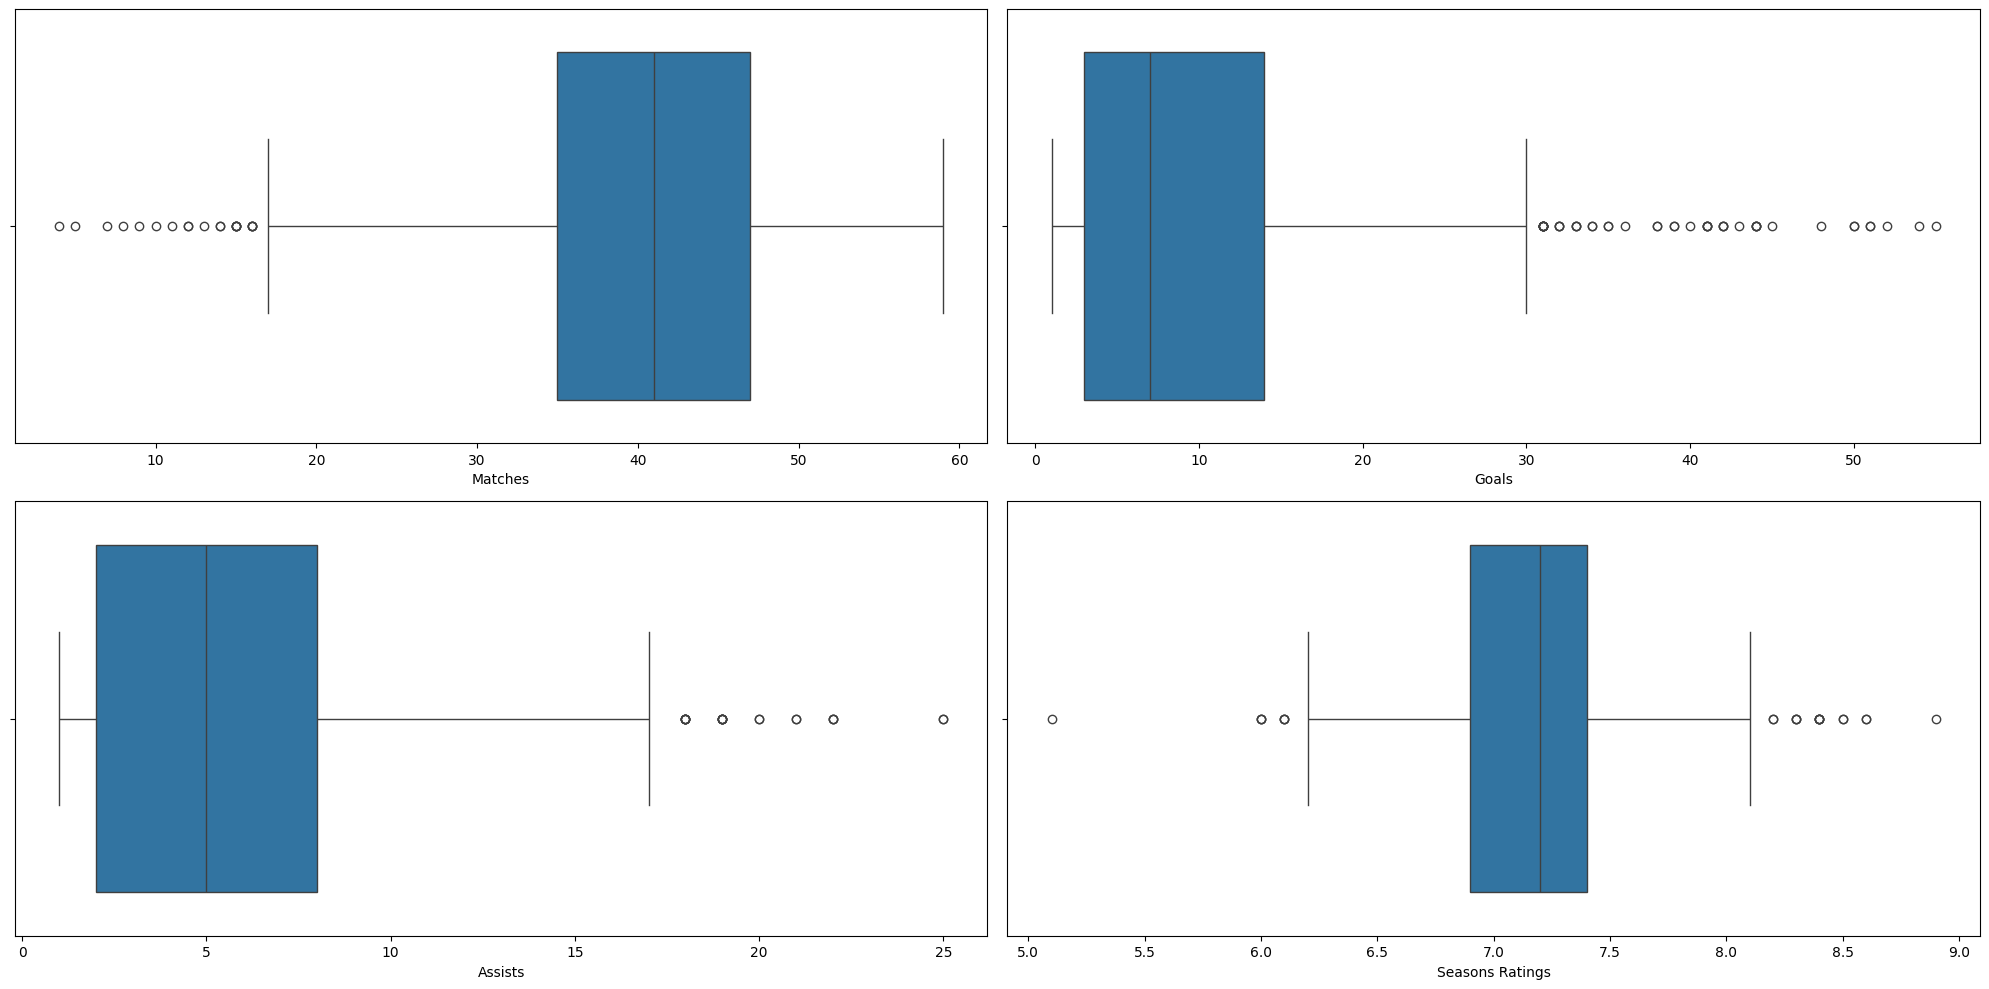

In [355]:
# Task : memeriksa sebaran data khususnya outlier
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

> Terlihat banyak outlier yang perlu dibersihkan

In [356]:
# drop outlier menggunakan IQR
# hanya kolom numerik yang bisa dihitung IQR
q1 = df[numerical_features].quantile(0.25) 
q3 = df[numerical_features].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

df = df[~((df[numerical_features] < batas_bawah) | (df[numerical_features] > batas_atas)).any(axis=1)]
df.shape

(867, 4)

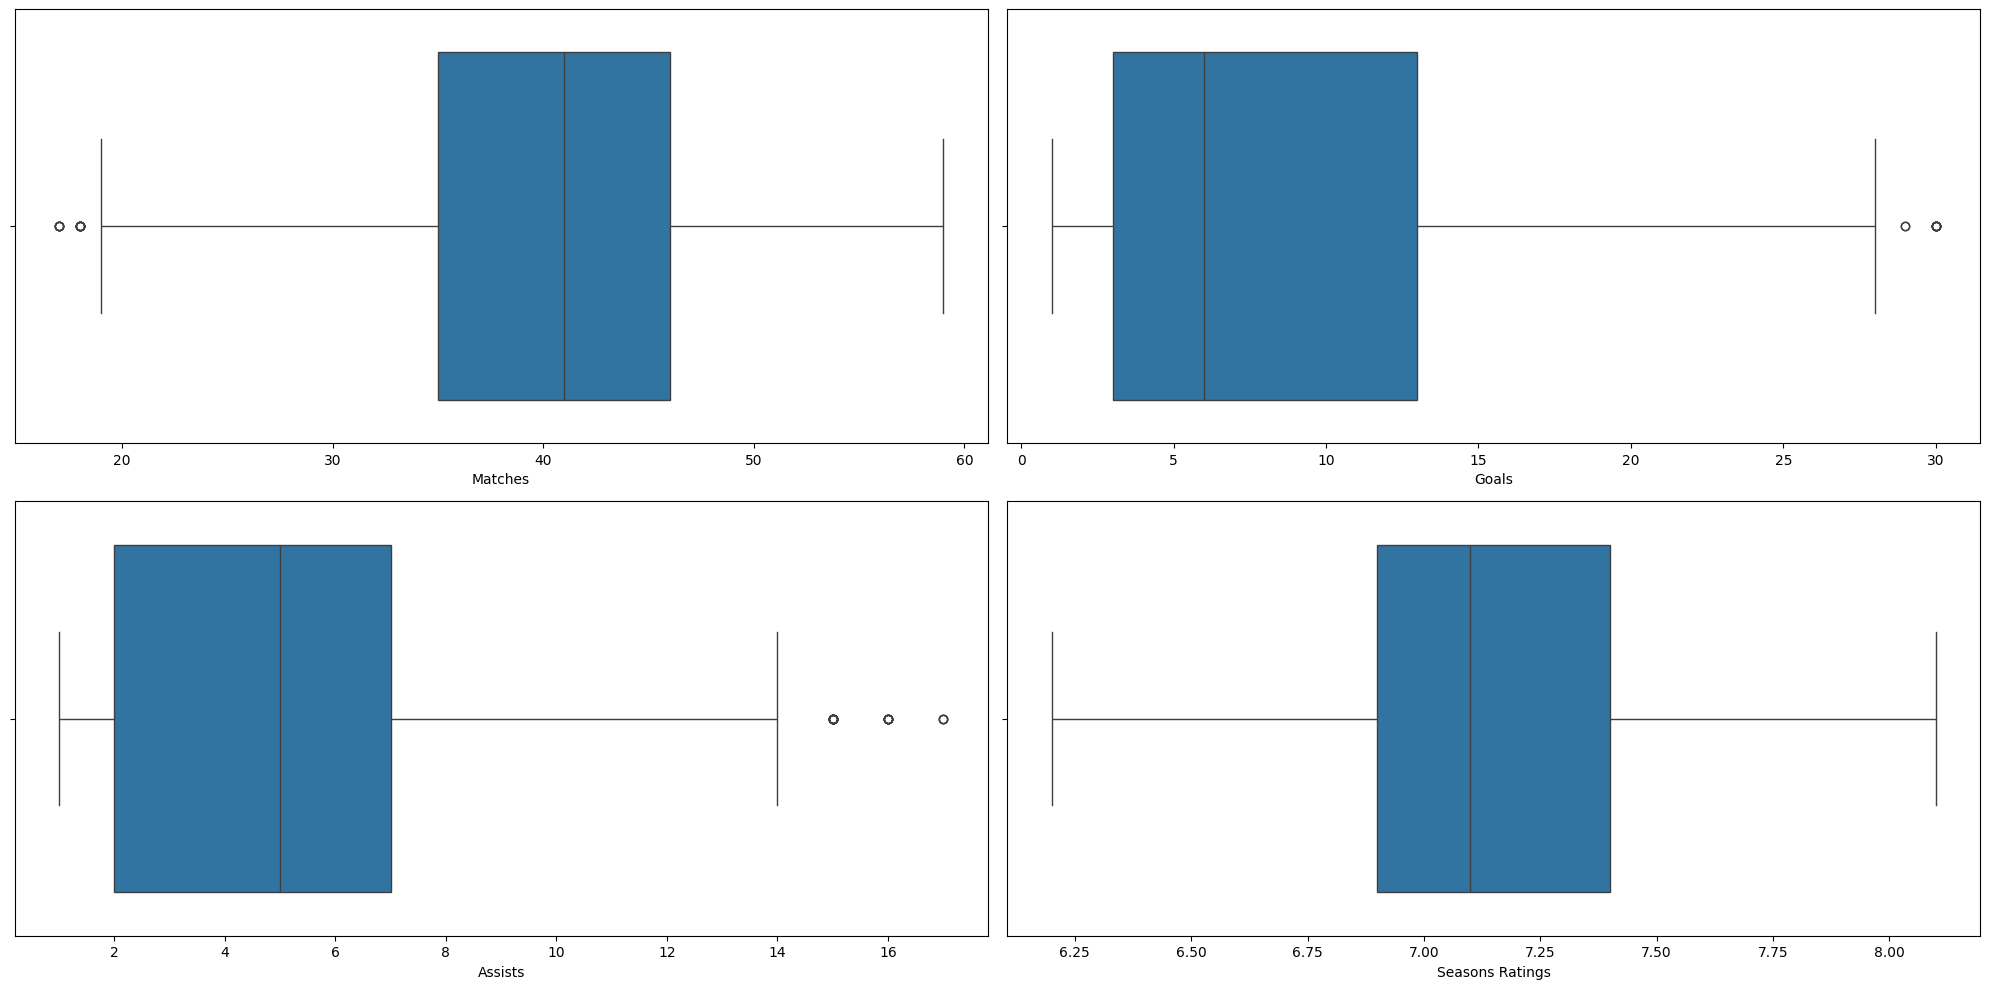

In [357]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

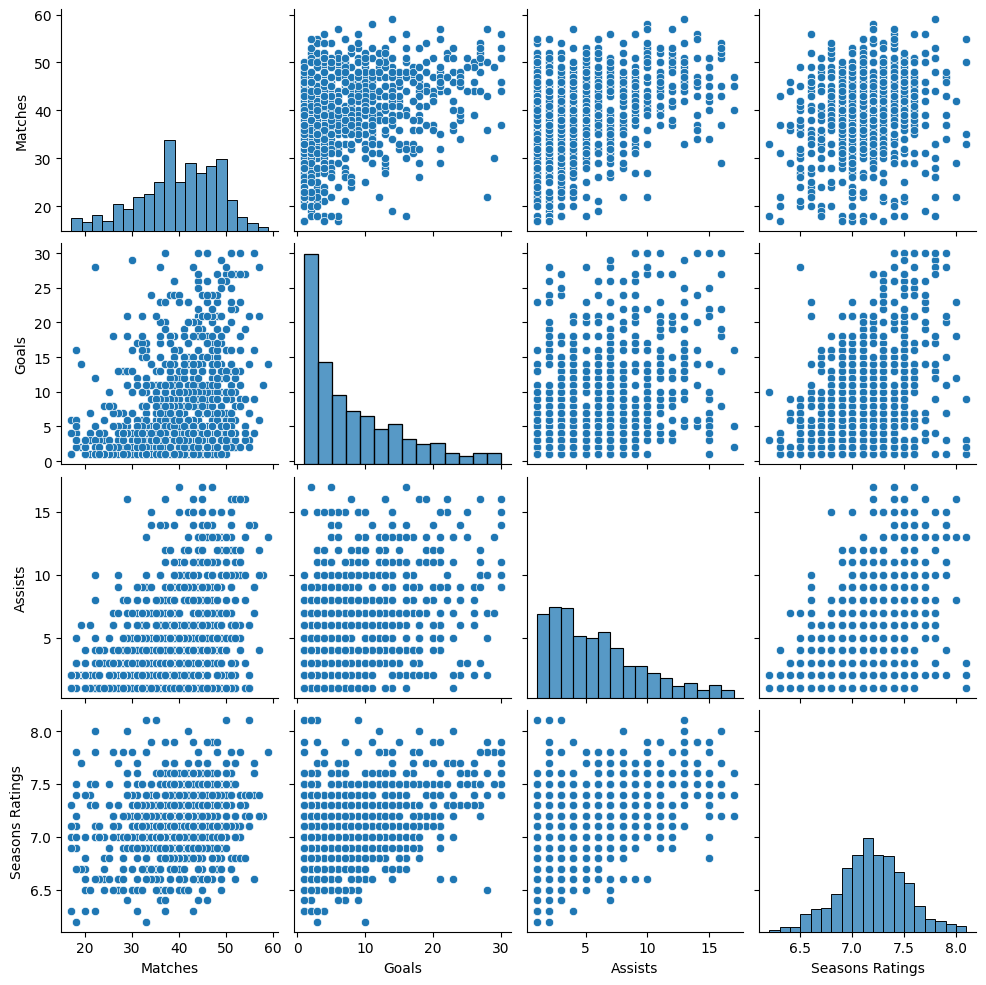

In [358]:
sns.pairplot(df)

In [359]:
# # Standardisasi (mean=0, std=1)
# scaler = StandardScaler()
# df['scaled_goals'] = scaler.fit_transform(df[['Goals']])

# # Normalisasi (0-1 range)
# scaler = MinMaxScaler()
# df['normalized_goals'] = scaler.fit_transform(df[['Goals']])

In [360]:
df

,Matches,Goals,Assists,Seasons Ratings
3,34,11,14,7.9
10,19,14,2,7.7
12,38,24,3,7.5
15,43,28,10,7.9
19,29,18,16,8.0
...,...,...,...,...
1211,43,13,10,7.1
1212,45,13,13,7.1
1213,41,14,2,6.7
1214,43,14,6,7.0


> 

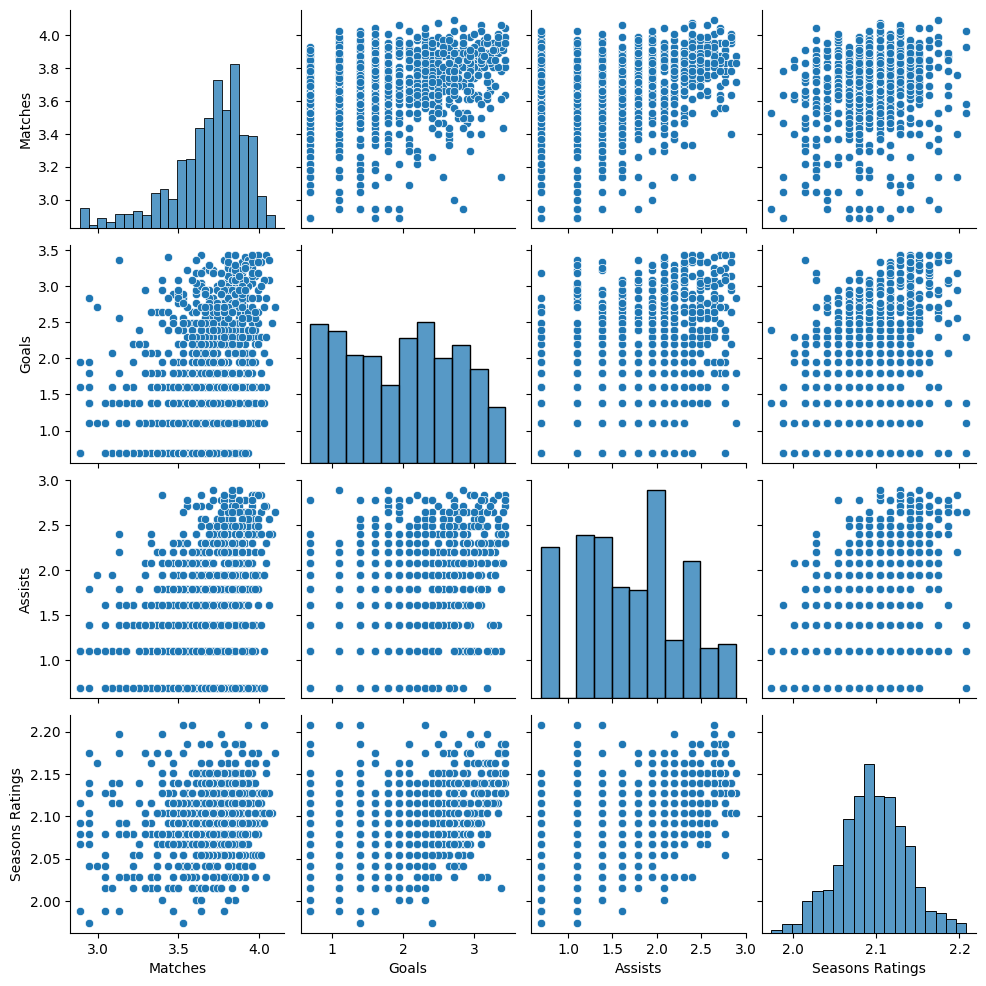

In [361]:
data1 = df.apply(lambda x : np.log1p(x))
sns.pairplot(data1)

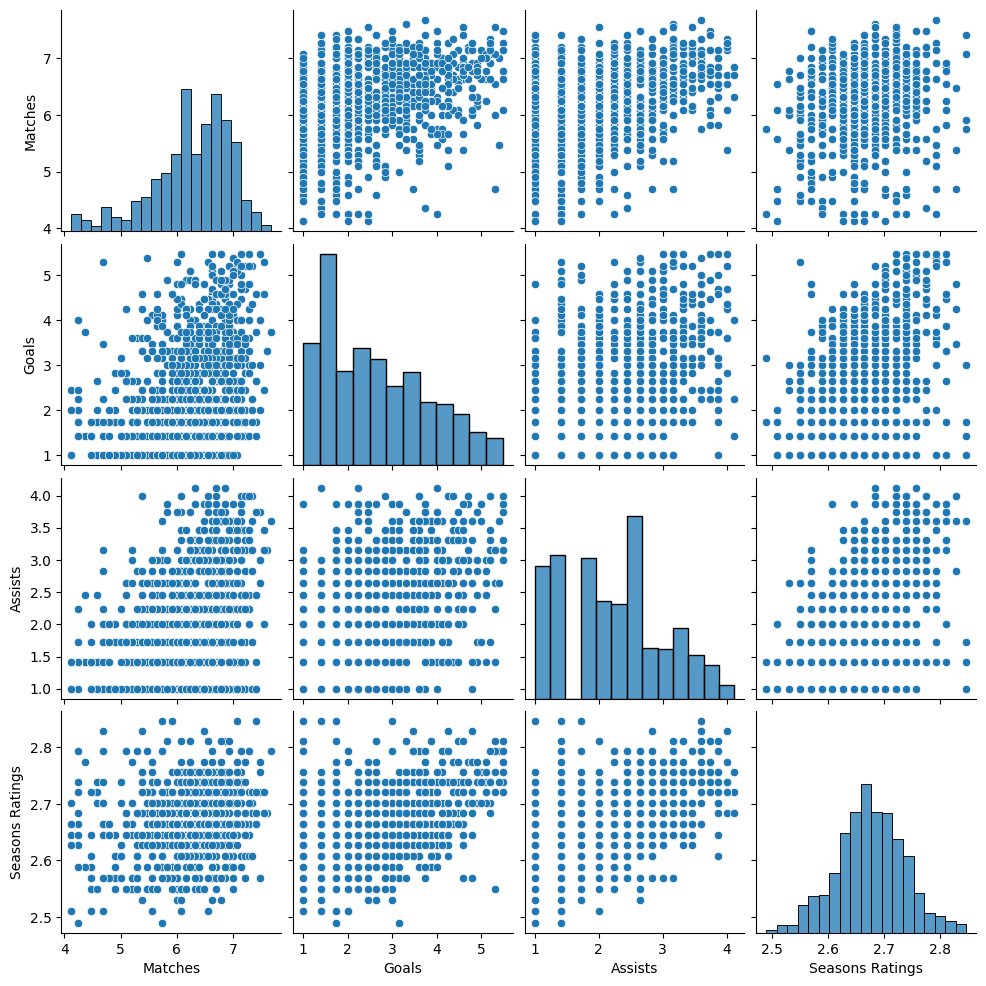

In [362]:
data2 = df.apply(lambda x : np.sqrt(x))
sns.pairplot(data2)

In [363]:
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,867.000000,867.000000,867.000000,867.000000
mean,39.813149,8.372549,5.442907,7.140830
std,8.458411,7.019493,3.776358,0.325928
min,17.000000,1.000000,1.000000,6.200000
25%,35.000000,3.000000,2.000000,6.900000
50%,41.000000,6.000000,5.000000,7.100000
75%,46.000000,13.000000,7.000000,7.400000
max,59.000000,30.000000,17.000000,8.100000


ValueError: Could not interpret value `scaled_goals` for `x`. An entry with this name does not appear in `data`.

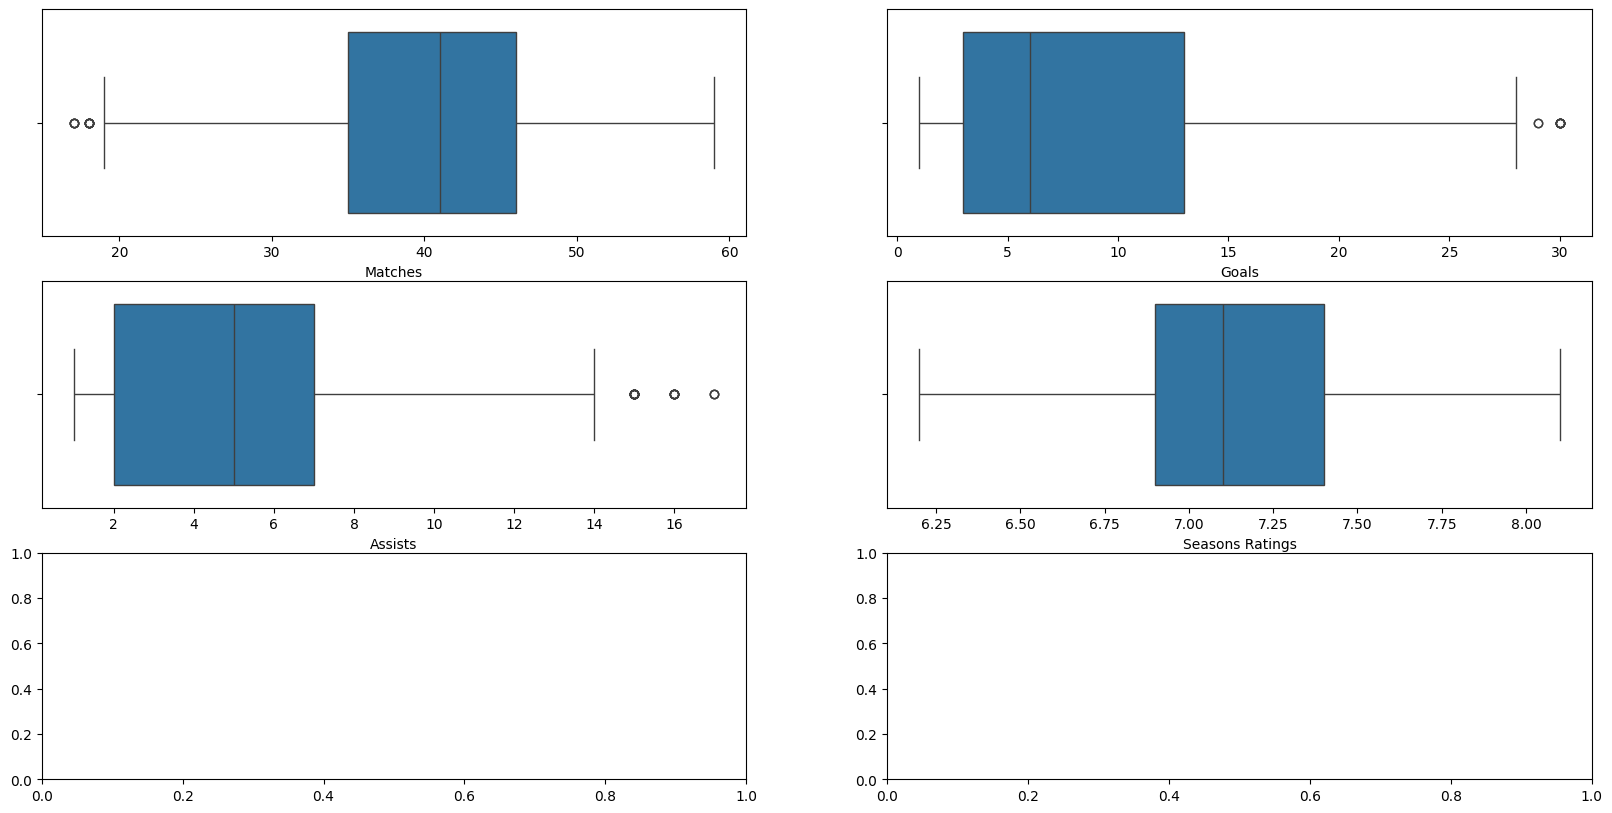

In [364]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
numerical_features = numerical_features + ['scaled_goals', 'normalized_goals']
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()